# E-Commerce Customer Churn

## Latar belakang dan Permasalahan

**Latar Belakang :**

Kemajuan teknologi menuntut pengambilan keputusan yang **cepat dan tepat**. Untuk itu, dibutuhkan analisis data yang efisien. **Machine Learning** menjadi solusi karena mampu menganalisis data dalam **waktu singkat** secara otomatis.

**Permasalahan :**

Analisis data dalam jumlah besar memakan waktu lama jika dilakukan secara manual. Diperlukan penerapan **Machine Learning** untuk mempercepat proses tersebut dan meningkatkan akurasi hasil analisis.

# DATA UNDERSTANDING

## Load data

In [ ]:
import pandas as pd

data = pd.read_csv('data_ecommerce_customer_churn.csv')
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## Type data

In [ ]:
data_kategorik = data.select_dtypes(include='object').columns
data_kategorik

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [ ]:
data_numerik = data.select_dtypes(include='number').columns
data_numerik

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [ ]:
len(data_kategorik)

2

In [ ]:
len(data_numerik)

9

## deskripsi fitur dan label

| **Fitur**                    | **Deskripsi**                                                                                                             |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Tenure**                   | Lama waktu pelanggan bergabung dengan perusahaan. Biasanya dalam bulan atau tahun.                                        |
| **WarehouseToHome**          | Jarak antara gudang ke rumah pelanggan (kemungkinan dalam km atau mil).                                                   |
| **NumberOfDeviceRegistered** | Jumlah perangkat yang terdaftar oleh pelanggan. Semakin banyak perangkat, bisa jadi menunjukkan keterlibatan yang tinggi. |
| **PreferedOrderCat**         | Kategori produk yang paling sering dipesan dalam bulan terakhir. Ini biasanya data kategorikal.                           |
| **SatisfactionScore**        | Skor kepuasan pelanggan (mungkin dari 1–5 atau 1–10).                                                                     |
| **MaritalStatus**            | Status pernikahan pelanggan (kategorikal, misal: "Married", "Single", dll).                                               |
| **NumberOfAddress**          | Jumlah alamat yang ditambahkan oleh pelanggan. Bisa jadi indikator mobilitas atau keaktifan.                              |
| **Complaint**                | Apakah pelanggan mengajukan komplain bulan lalu (Boolean: Ya/Tidak atau 1/0).                                             |
| **DaySinceLastOrder**        | Jumlah hari sejak terakhir kali pelanggan memesan.                                                                        |
| **CashbackAmount**           | Rata-rata cashback yang diterima pelanggan dalam bulan lalu.                                                              |
| **Churn**                    | Label target. Menunjukkan apakah pelanggan churn atau tidak (biasanya 0 = tidak churn, 1 = churn).                        |


## Data Agg

In [ ]:
data.select_dtypes(include='number').describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


## Missing value dan Value 0

### Missing value

In [ ]:
missing_value = data.isna().sum().reset_index(name='Jumlah Missing Value')
missing_value['persentase'] = round(missing_value['Jumlah Missing Value'] / len(data) * 100, 2)
missing_value.sort_values(by='persentase', ascending=False).head(5)

,index,Jumlah Missing Value,persentase
8,DaySinceLastOrder,213,5.40
0,Tenure,194,4.92
1,WarehouseToHome,169,4.29
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00


### Value 0

In [ ]:
value_0 = data.isin([0]).sum().reset_index(name='Jumlah Value 0')
value_0['persentase'] = round(value_0['Jumlah Value 0'] / len(data) * 100, 2)
value_0.sort_values(by='persentase', ascending=False).head(5)

,index,Jumlah Value 0,persentase
10,Churn,3267,82.90
7,Complain,2828,71.76
0,Tenure,347,8.80
8,DaySinceLastOrder,345,8.75
9,CashbackAmount,3,0.08


karena churn dan complain itu menjukan langganan/tidak dan iya/tidak

tenure 0 itu adalah pelanggan yang baru bergabung

DaySinceLastOrder 0 adalah pelanggan yang baru melakukan order hari ini

CashbackAmount 0 adalah pelanggan tidak menerima cashback dalam periode tertentu


jadi kesimpulannya ini tidak perlu di imputasi kemungkinan data ini valid dikarenakan dalam transaksi di ecomerce emmungkin pelanggan baru bergabung bisa memesan banyak product dan saat pesanan nya tiba bisa juga komplain dan langsung memutus berlanggan atau tidak dan ini sangat wajar ditengah persaingan ecomerce

## Duplikat

In [ ]:
data.duplicated().sum()

np.int64(671)

In [ ]:
data_d = data[data.duplicated(keep=False)]
data_d.sort_values(by=list(data.columns)).head(10)



,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2974,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
3576,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
300,0.0,6.0,3,Mobile,4,Single,2,1,4.0,132.02,1
575,0.0,6.0,3,Mobile,4,Single,2,1,4.0,132.02,1
1364,0.0,6.0,4,Mobile,4,Single,2,0,0.0,128.36,0
2821,0.0,6.0,4,Mobile,4,Single,2,0,0.0,128.36,0
640,0.0,6.0,4,Mobile Phone,3,Single,1,1,2.0,137.30,1
3333,0.0,6.0,4,Mobile Phone,3,Single,1,1,2.0,137.30,1
767,0.0,8.0,1,Laptop & Accessory,3,Married,2,0,7.0,152.06,0
1696,0.0,8.0,1,Laptop & Accessory,3,Married,2,0,7.0,152.06,0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.reset_index(drop=True, inplace=True)
data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


## save data ( digunakan untuk machine learning, tidak ada duplikat)

In [ ]:
data.to_csv('data_ml.csv', index=False)

## kesimpulan

- data memiliki 3941 rows dan 11 columns
- type data 2 column kategorik dan 9 column numerik
- data describenya tidak ada value yang mines

- ada beberapa column yang memiliki missing value yaitu :
1. DaySinceLastOrder :	213
2. Tenure	: 194
3. WarehouseToHome	: 169

- dan ada yang memiliki value 0 tapi disini value 0 itu valid dikarenakan :
1. churn dan complain itu menjukan langganan/tidak dan iya/tidak
2. tenure 0 itu adalah pelanggan yang baru bergabung
3. DaySinceLastOrder 0 adalah pelanggan yang baru melakukan order hari ini
4. ashbackAmount 0 adalah pelanggan tidak menerima cashback dalam periode tertentu

- data memiliki duplikat sebanyak 671
- save data yang tidak mengandung duplikat untuk digunakan saat di machine learning

# CLEANING DENGAN KNN IMPUTER ( HANYA UNTUK EDA, BUKAN UNTUK SEBELUM SPLITING )

### Catatan Rekomendasi n_neighbors

| Ukuran Data   | Rekomendasi `n_neighbors` |
| ------------- | ------------------------- |
| Kecil (<1000) | 3–5                       |
| Sedang        | 5–10                      |
| Besar         | 10+                       |


### preparation

In [ ]:
import pandas as pd

data_knn = pd.read_csv('data_ecommerce_customer_churn.csv')
data_knn.drop_duplicates(inplace=True)
data_knn.reset_index(drop=True, inplace=True)
data_knn

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


In [ ]:
data_knn.isna().sum().sort_values(ascending=False).head(5)

,0
DaySinceLastOrder,181
Tenure,160
WarehouseToHome,135
NumberOfDeviceRegistered,0
PreferedOrderCat,0


### Imputasi

In [ ]:
from sklearn.impute import KNNImputer

data_num = data_knn.select_dtypes(include='number')

# Buat salinan data
data_num_knn = data_num.copy()

# Inisialisasi dan fit-transform
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(data_num_knn)

# Masukkan kembali hasilnya ke DataFrame
data_knn_imputed = pd.DataFrame(data_imputed, columns=data_num.columns)

data_knn_imputed.isna().sum().sort_values(ascending=False)


,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0
Churn,0


In [ ]:
data_knn_imputed

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,20.0,25.0,4.0,3.0,7.0,0.0,6.0,230.27,0.0
4,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5.0,4.0,7.0,0.0,8.0,249.90,0.0
3266,26.0,7.0,4.0,1.0,4.0,0.0,9.0,295.99,0.0
3267,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3268,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0


### Save data

In [ ]:
import pandas as pd

data_knn_imputed.to_csv('data_clean_knn.csv', index=False)

saya menggunakan knn imputer hanya untuk digunakan explorasi data,bukan digunakan di modeling dikarenakan tidak boleh melakukan imputasi sebelum spilt data

dan menyimpan datanya untuk dipakai saat EDA

# EXPLORASI DATA

In [ ]:
import pandas as pd

data_knn = pd.read_csv('data_clean_knn.csv')
data_knn.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

### Distribusi

1. grafik distribusi

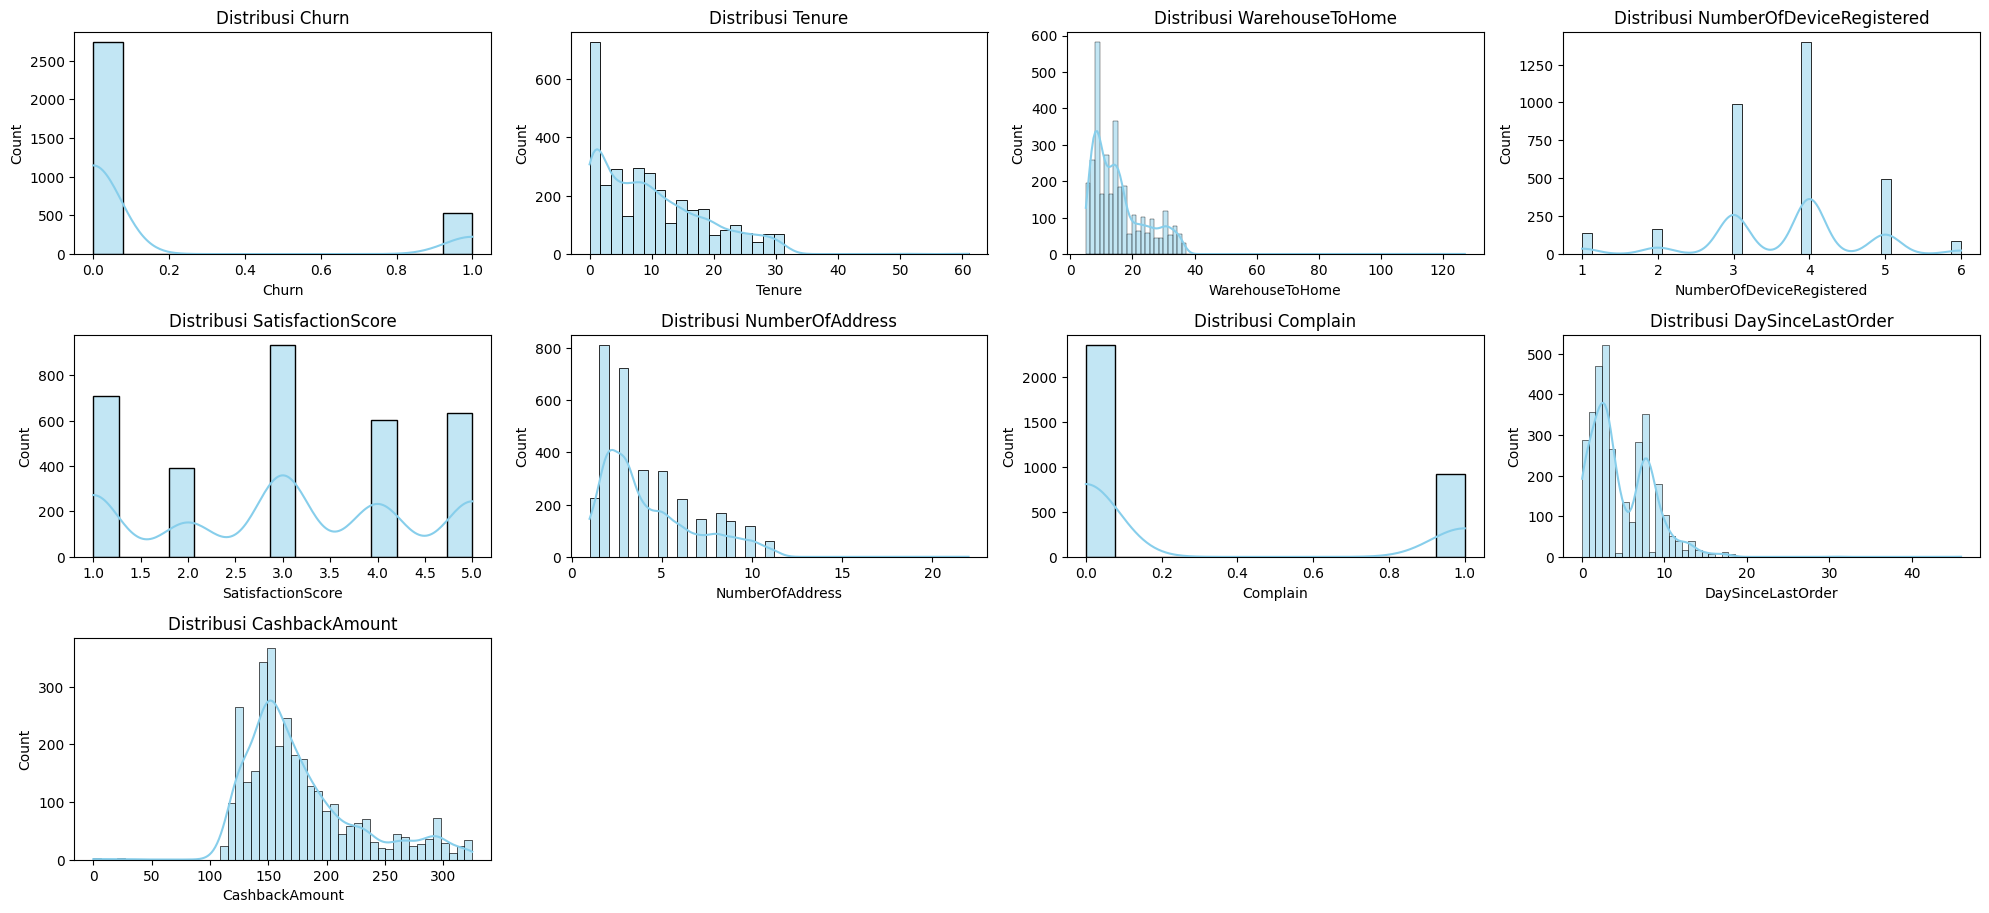

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Churn','Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']

# Plot distribusi dan outlier
plt.figure(figsize=(20, 30))

for i, col in enumerate(cols):
    plt.subplot(10, 4, i+1)
    sns.histplot(data_knn[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')


plt.tight_layout()
plt.show()

2. uji normalitas distribusi

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

cols = data_knn[cols]

# Uji Shapiro-Wilk
for col in cols.columns:
    stat, p = stats.shapiro(cols[col])
    print(f"Kolom: {col}")
    print(f"  Shapiro-Wilk Test Statistic: {stat}")
    print(f"  Shapiro-Wilk p-value: {p}")
    if p > 0.05:
        print(f"{col} memiliki distribusi normal.\n")
    else:
        print(f"{col} tidak memiliki distribusi normal.\n")

Kolom: Churn
  Shapiro-Wilk Test Statistic: 0.4449344901605755
  Shapiro-Wilk p-value: 2.457281091471925e-72
Churn tidak memiliki distribusi normal.

Kolom: Tenure
  Shapiro-Wilk Test Statistic: 0.9123277814671713
  Shapiro-Wilk p-value: 6.322300144474641e-40
Tenure tidak memiliki distribusi normal.

Kolom: WarehouseToHome
  Shapiro-Wilk Test Statistic: 0.8657257264654443
  Shapiro-Wilk p-value: 1.5512053720871941e-46
WarehouseToHome tidak memiliki distribusi normal.

Kolom: NumberOfDeviceRegistered
  Shapiro-Wilk Test Statistic: 0.8953027055237042
  Shapiro-Wilk p-value: 1.2966212251170327e-42
NumberOfDeviceRegistered tidak memiliki distribusi normal.

Kolom: SatisfactionScore
  Shapiro-Wilk Test Statistic: 0.8864589908094078
  Shapiro-Wilk p-value: 7.148555143335306e-44
SatisfactionScore tidak memiliki distribusi normal.

Kolom: NumberOfAddress
  Shapiro-Wilk Test Statistic: 0.8743731532477483
  Shapiro-Wilk p-value: 1.8095995576352524e-45
NumberOfAddress tidak memiliki distribusi no

3. persebaran distribusi antara fitur vs label

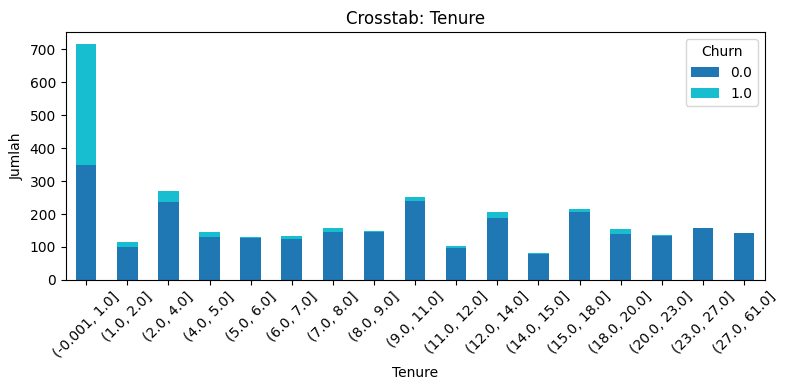

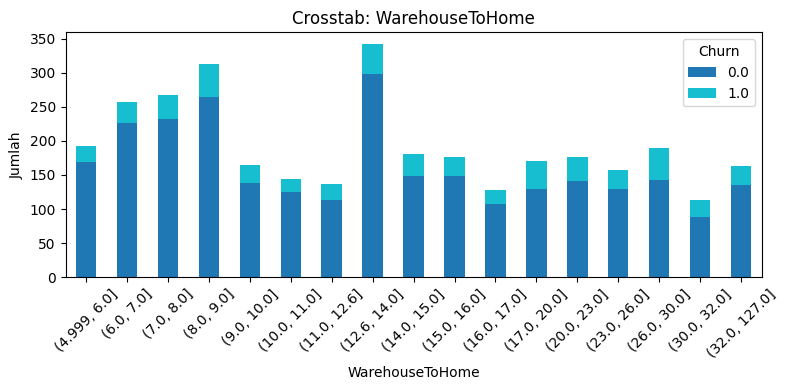

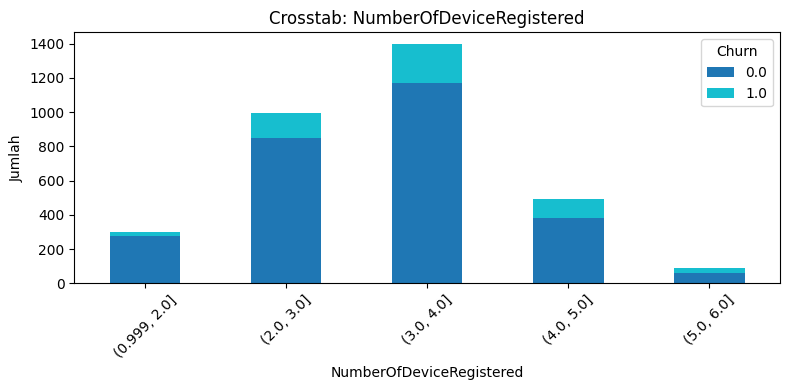

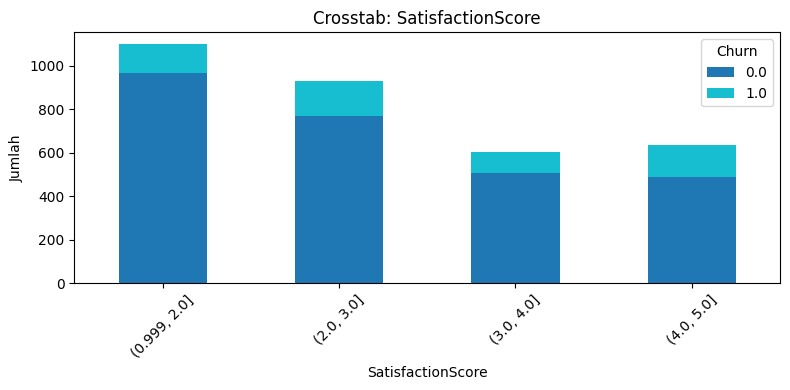

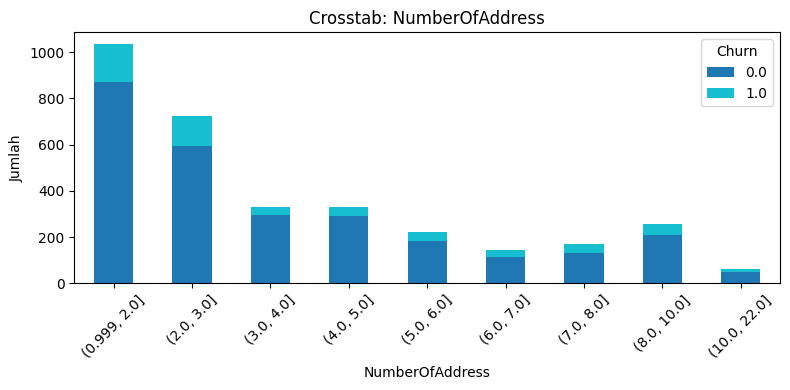

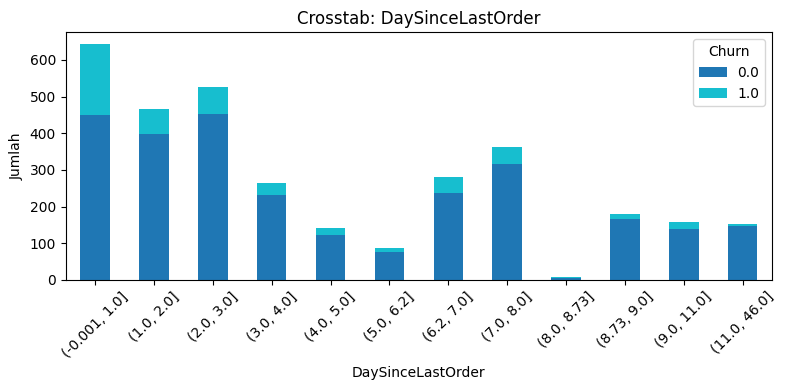

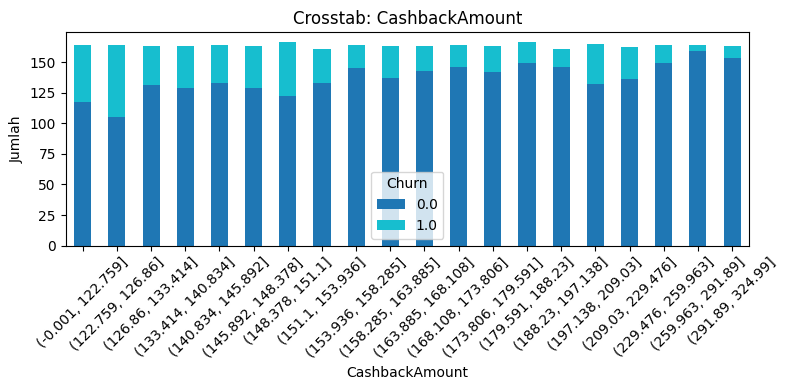

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_grafik = data_knn.copy()

# Daftar fitur yang ingin dianalisis (selain Churn)
features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
            'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
            'CashbackAmount']

# Loop crosstab dan plot
for feat in features:
    data_grafik[feat + '_binned'] = pd.qcut(data_grafik[feat], q=20, duplicates='drop')
    col_to_plot = feat + '_binned'
    ct = pd.crosstab(data_grafik[col_to_plot], data_grafik['Churn'])
    title = f'Crosstab: {feat}'

    # Plot
    ct.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='tab10')
    plt.title(title)
    plt.xlabel(feat)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

kesimpulannya seluruh fitur tidak memiliki distribusi normal dan untuk distribusi label('Churn') tidak balace/imbalace

dan distribusi label dengan fitur sangat terseberar makannya dibutuhkan machine learning untuk mempercepat hasil analisis dengan data yang cukup banyak

### Outlier

In [ ]:
data_o = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']

def check_outlier(data_knn, data_o):
    hasil_outlier = {}
    for col in data_o:
        q1 = data_knn[col].quantile(0.25)
        q3 = data_knn[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = data_knn[(data_knn[col] < lower_bound) | (data_knn[col] > upper_bound)]
        hasil_outlier[col] = {
            'jumlah_outliers' : outliers.shape[0],
            'Persentase Outlier': (outliers.shape[0] / data_knn.shape[0]) * 100
        }
    return pd.DataFrame(hasil_outlier).T
check_outlier(data_knn, data_o).sort_values(by='Persentase Outlier', ascending=False)

,jumlah_outliers,Persentase Outlier
CashbackAmount,253.0,7.737003
NumberOfDeviceRegistered,226.0,6.911315
DaySinceLastOrder,9.0,0.275229
Tenure,4.0,0.122324
NumberOfAddress,3.0,0.091743
WarehouseToHome,1.0,0.030581
SatisfactionScore,0.0,0.000000


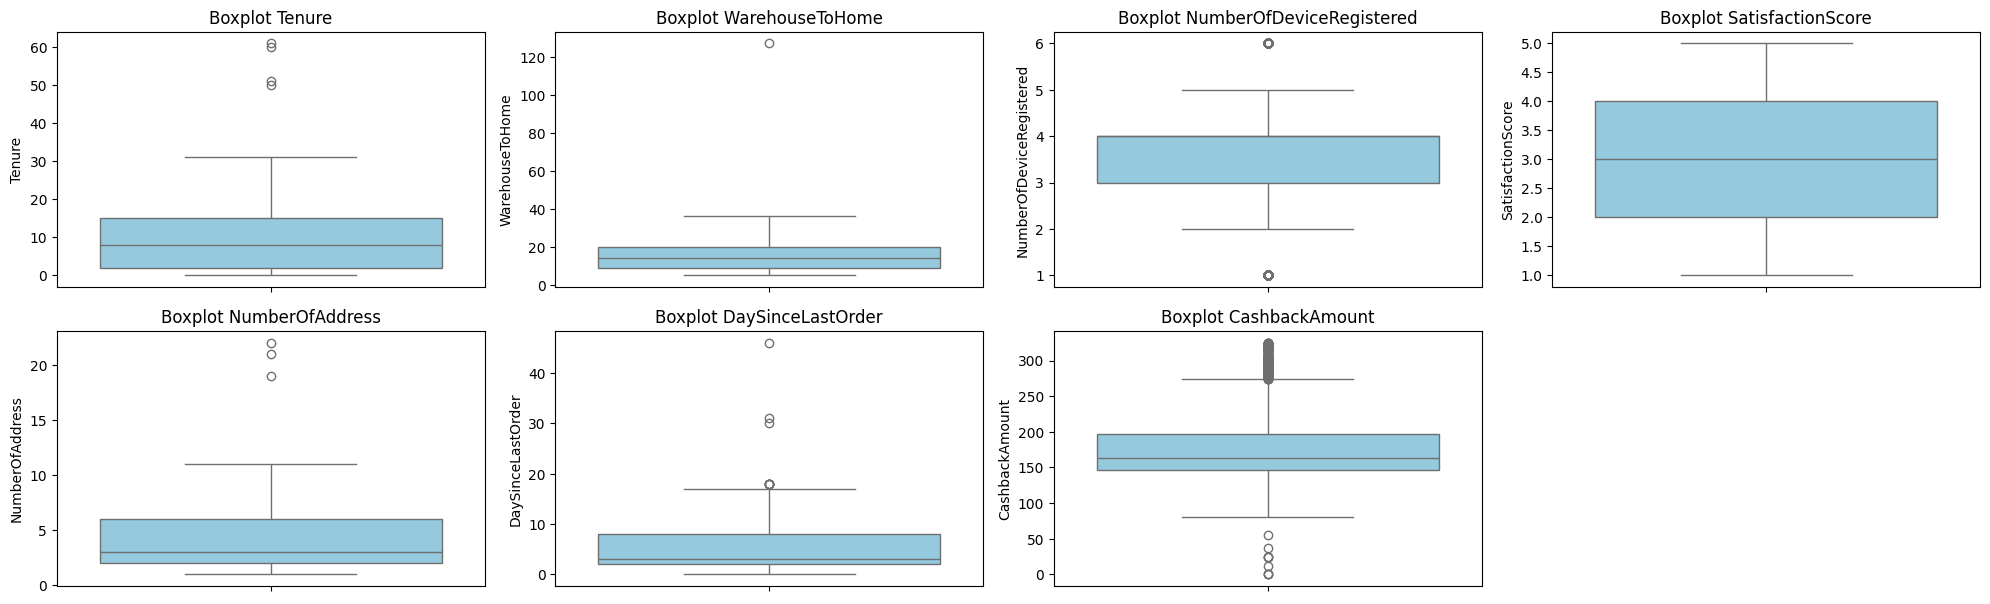

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))

for i, col in enumerate(data_o):
    plt.subplot(10, 4, i+1)
    sns.boxplot(data_knn[col], color='skyblue')
    plt.title(f'Boxplot {col}')


plt.tight_layout()
plt.show()

### Korelasi

- korelasi antara fitur dan label

In [ ]:
data_knn.corr(method='spearman')['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Complain,0.262278
NumberOfDeviceRegistered,0.104776
SatisfactionScore,0.097100
WarehouseToHome,0.078863
NumberOfAddress,0.033872
DaySinceLastOrder,-0.157666
CashbackAmount,-0.170794
Tenure,-0.410056


## column kategorik yang akan di encode

In [ ]:
import pandas as pd

data = pd.read_csv('data_ecommerce_customer_churn.csv')
data.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [ ]:
data.select_dtypes(include='object').columns

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

In [ ]:
data[['PreferedOrderCat', 'MaritalStatus']].nunique()

,0
PreferedOrderCat,6
MaritalStatus,3


kesimpulannya menggunakan onehot encoding dikarenakan jumlah group <15

## column numerik yang ingin di scaling

In [ ]:
data.select_dtypes(include='number').describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


kesimpulannya yang akan di scaling hanya kolom CashbackAmout min:0 max:324.9 ini yang paling jauh scalanya dikarenakan CashbackAmout memiliki outlier upper dan lower yang lumayan banyak maka cocok memakai robust_scaler

## Tipe masalah

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,3267
1,674


kita bisa simpulkan tipe masalahnya adalah Binary classification dikarenakan target adalah biner 0 dan 1 / 2 kelas

misal lebih dari > 2 kelas masuk ke Multiclass classification

dan jumlah label yang tidak seimbang maka saya akan menggunakan Oversampling yaitu SMOTE alasannya memakai SMOTE karena jumlah datanya yang sedikit:3269  misal data nya lebih dari 10.000 mungkin bisa dipertimbangkan pakai under sampling karena machine learning semakin jumlah datanya banyak semakin baik dia belajar dari sebuah data

# MACHINE LEARNING

disini saya akan menguji 6 model  sekaligus :

1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier
4. LGBMClassifier
5. RandomForestClassifier
6. XGBClassifier

kenapa saya mencoba semuanya padahal dari edanya kita melihat distribusi tidak normal, memiliki outlier harusnya ini cocok untuk model LGBMClassifier, RandomForestClassifier, XGBClassifier, DecisionTreeClassifier karena saya ingin menguji coba apakah model LogisticRegression, KNeighborsClassifier yang sesnsitif terhadap outlier walaupun sudah di scaling tapi pakah hasilnya bagus jadi itu alasan saya melakukannya walupun saya tahu ke2 model itu tidak maksimal beroperasi disaat data memiliki outlier dan distribusi tidak normal

## 6 Model Dengan scaling

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

data_ml = pd.read_csv('data_ml.csv')

# Pisahkan fitur dan target
X = data_ml.drop('Churn', axis=1)
y = data_ml['Churn']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

# pilih fitur yang akan di imputasi, encode dan scaling
imputasi = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
encode = ['PreferedOrderCat', 'MaritalStatus']
scaling = ['CashbackAmount']


# Buat pipeline untuk masing-masing transformasi: imputasi, encoding, dan scaling
knn_imputer_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
rb_scaling_transformer = Pipeline(steps=[
    ('rb_scaling', RobustScaler())
])


# Gabungkan semua transformasi ke dalam ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('knn_imputer', knn_imputer_transformer, imputasi),
    ('onehot', onehot_transformer, encode),
    ('rb_scaling', rb_scaling_transformer, scaling)
], remainder='passthrough')

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),   # tidak perlu random_state
    'LGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42)
}

model_results = []

for name, model in models.items():
    #pipeline keseluruhan/final
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 1642, number of negative: 1642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3161
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
5,xgboost,0.906728,0.654206,0.744681,0.696517
3,LGBM,0.903670,0.598131,0.761905,0.670157
4,Random Forest,0.899083,0.588785,0.741176,0.656250
1,Decision Tree,0.859327,0.635514,0.561983,0.596491
0,Logistic Regression,0.798165,0.728972,0.430939,0.541667
2,KNN,0.764526,0.700935,0.380711,0.493421


## 6 Model Tanpa scaling

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

data_ml = pd.read_csv('data_ml.csv')

# Pisahkan fitur dan target
X = data_ml.drop('Churn', axis=1)
y = data_ml['Churn']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

# Split lagi TrainVal menjadi Training (60%) dan Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=2020
) # 0.25 itu didapat dari 20% dibagi 80% (data training)

imputasi = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
encode = ['PreferedOrderCat', 'MaritalStatus']

knn_imputer_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('knn_imputer', knn_imputer_transformer, imputasi),
    ('onehot', onehot_transformer, encode),
], remainder='passthrough')

## kandidat model
models = {
    'Logistic Regression': LogisticRegression(), # random_state tidak perlu untuk 'liblinear'
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),   # tidak perlu random_state
    'LGBM': LGBMClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'xgboost': XGBClassifier(random_state=42)
}

model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_val_pred = pipeline.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'F1': f1
    })


# Tampilkan hasil perbandingan
results_df = pd.DataFrame(model_results)
result_df = results_df.sort_values(by='F1', ascending=False)
result_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 1642, number of negative: 1642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2907
[LightGBM] [Info] Number of data points in the train set: 3284, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1
3,LGBM,0.905199,0.607477,0.764706,0.677083
5,xgboost,0.900612,0.607477,0.738636,0.666667
4,Random Forest,0.894495,0.551402,0.737500,0.631016
1,Decision Tree,0.857798,0.607477,0.560345,0.582960
0,Logistic Regression,0.798165,0.728972,0.430939,0.541667
2,KNN,0.764526,0.700935,0.380711,0.493421


## KESIMPULAN

### Hasil metrik 6 Model dengan scaling

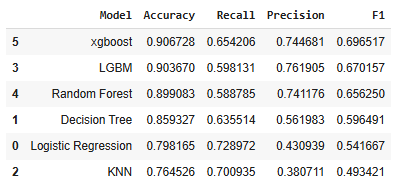

### hasil metrik 6 model tanpa scaling

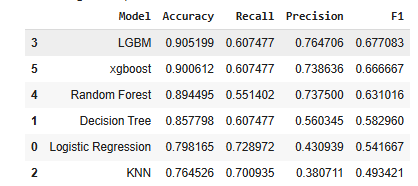

dan kita bisa simpulkan ternya benar bahwa logistik regression dan knn clasifier kurang maksimal beroperasi saat ada outlier dan distribusi tidak normal

saya menggunakan scaling terhadap feature yang memilki nilai tinggi yaitu CashbackAmout dan kenapa menggunakan robust scaling dikarenakan Column tersebut mempunyai banayak Outlier sekitar 8.01% dari jumlah keseluruhan

Hasil metrik dari 6 model, model dengan scaling berjalan lebih baik dari pada model tidak melakuakan scaling  maka xgboost dan LGBM akan dievaluasi bedasarkan accuracy,recall,precision,f1 tertinggi

# EVALUASI BEST MODEL


## Cross validasion Best Model LGBM DAN XGB

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load data
data_ml = pd.read_csv('data_ml.csv')

# Pisahkan fitur dan target
X = data_ml.drop('Churn', axis=1)
y = data_ml['Churn']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)


imputasi = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
encode = ['PreferedOrderCat', 'MaritalStatus']
scaling = ['CashbackAmount']

knn_imputer_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
rb_scaling_transformer = Pipeline(steps=[
    ('rb_scaling', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('knn_imputer', knn_imputer_transformer, imputasi),
    ('onehot', onehot_transformer, encode),
    ('rb_scaling', rb_scaling_transformer, scaling)
], remainder='passthrough')

## kandidat model
models = {
    'xgboost': XGBClassifier(random_state=42),
    'lightgbm': LGBMClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    f1_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

    model_results.append({
        'Model': name,
        'Fold-1': f1_scores[0],
        'Fold-2': f1_scores[1],
        'Fold-3': f1_scores[2],
        'Fold-4': f1_scores[3],
        'Fold-5': f1_scores[4],
        'Mean F1': f1_scores.mean(),
        'Std F1': f1_scores.std()

    })


result_df = pd.DataFrame(model_results).T
result_df


,0,1
Model,xgboost,lightgbm
Fold-1,0.653846,0.710526
Fold-2,0.608108,0.653061
Fold-3,0.695652,0.731707
Fold-4,0.701299,0.725
Fold-5,0.708075,0.675
Mean F1,0.673396,0.699059
Std F1,0.037739,0.030216


### kesimpulan Cross vaidation

MOdel LGBM lebih baik dari pada Model XGB bedasarkan kfoldnya Model LGBM meannya lebih tinggi dan stdnya lebih kecil(std semakin kecil tandanya lebih stabil) berarti model LGBM lebih stabil dibanding model XGB

## Hyperparameter tuning best model

### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline



pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LGBMClassifier(random_state=42))
    ])

lgbm_params = {
    'classifier__n_estimators': [100, 300, 500, 1000],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}

lgbm_grid = GridSearchCV(
    estimator=pipeline,
    param_grid=lgbm_params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

lgbm_grid.fit(X_train, y_train)

print("Best parameters (LightGBM):", lgbm_grid.best_params_)
print("Best F1 Score:", lgbm_grid.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3358
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

# FINAL MODEL LGBM

## Modeling

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import warnings

data_ml = pd.read_csv('data_ml.csv')

# Pisahkan fitur dan target
X = data_ml.drop('Churn', axis=1)
y = data_ml['Churn']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2020
)

imputasi = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
encode = ['PreferedOrderCat', 'MaritalStatus']
scaling = ['CashbackAmount']

knn_imputer_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
rb_scaling_transformer = Pipeline(steps=[
    ('rb_scaling', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('knn_imputer', knn_imputer_transformer, imputasi),
    ('onehot', onehot_transformer, encode),
    ('rb_scaling', rb_scaling_transformer, scaling)
], remainder='passthrough')


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier',  LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7, random_state=42))
])

pipeline.fit(X_train, y_train)
warnings.filterwarnings("ignore", category=UserWarning)

y_test_pred = pipeline.predict(X_test)

# Hitung metrik
acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Buat DataFrame hasil evaluasi
test_eval_df = pd.DataFrame([{
    'Model': 'LGBMClassifier test',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1 Score': f1,

}])

test_eval_df

[LightGBM] [Info] Number of positive: 2189, number of negative: 2189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3358
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

,Model,Accuracy,Recall,Precision,F1 Score
0,LGBMClassifier test,0.920489,0.71028,0.783505,0.745098


## grafik metrik

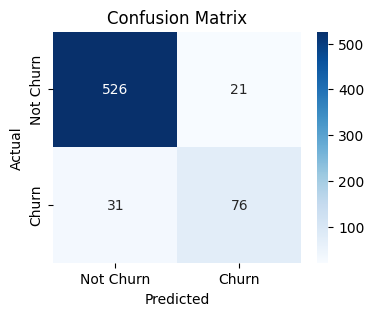

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


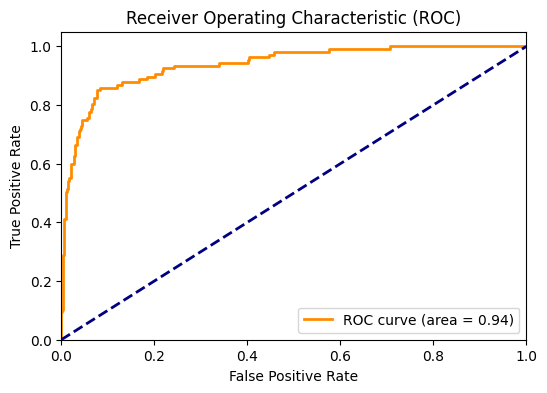

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Feature Importance

In [ ]:
import pandas as pd

feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Ambil importance dari model
importances = pipeline.named_steps['classifier'].feature_importances_


# Buat DataFrame importance
importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df['NormalizedImportance'] = importance_df['Importance'] / importance_df['Importance'].sum()
importance_df.drop(columns=['Importance'], inplace=True)

importance_df




,Fitur,NormalizedImportance
7,knn_imputer__CashbackAmount,0.188897
1,knn_imputer__WarehouseToHome,0.173096
15,rb_scaling__CashbackAmount,0.114093
0,knn_imputer__Tenure,0.105979
6,knn_imputer__DaySinceLastOrder,0.095872
3,knn_imputer__SatisfactionScore,0.085623
4,knn_imputer__NumberOfAddress,0.077153
2,knn_imputer__NumberOfDeviceRegistered,0.045125
5,knn_imputer__Complain,0.032384
14,onehot__MaritalStatus_Single,0.026263


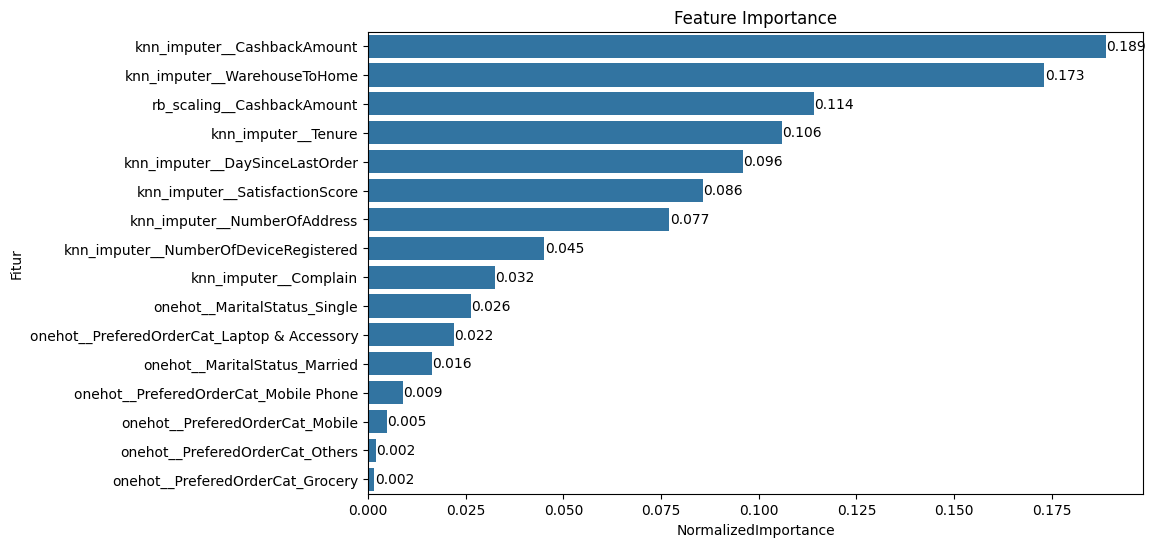

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='NormalizedImportance', y='Fitur', data=importance_df)

for p in ax.patches:
    x = p.get_width()  # Posisi X di akhir bar
    y = p.get_y() + p.get_height() / 2  # Posisi Y di tengah bar
    ax.text(x + 0.0102, y, f'{x:.3f}', va='center', fontsize=10, ha='right')

plt.title('Feature Importance')
plt.show()

## Kesimpulan

Dikarenakan hasilnya masih dibawah standatr yaitu recall, precision, f1-scorenya masih dibwah 8 scorenya saya mencoba menambahkan data yang saya cari di kagle dengan column yang sama karena misal tidak sama column tidak bisa menggabungkan data dikarenakan akan mengganggu model

# PENAMBAHAN DATA EXTERNAL

## Load data

### data external dari Kagle

In [ ]:
import pandas as pd

data3 = pd.read_excel('data3.xlsx')
data3

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,4.0,6.0,3,Laptop & Accessory,2,Single,9,1,5.0,159.93,1
1,NaN,8.0,4,Mobile,3,Single,7,1,0.0,120.90,1
2,NaN,30.0,4,Mobile,3,Single,6,1,3.0,120.28,1
3,0.0,15.0,4,Laptop & Accessory,5,Single,8,0,3.0,134.07,1
4,0.0,12.0,3,Mobile,5,Single,3,0,3.0,129.60,1
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,2,Laptop & Accessory,1,Married,6,0,4.0,150.71,0
5626,13.0,13.0,5,Fashion,5,Married,6,0,NaN,224.91,0
5627,1.0,11.0,2,Laptop & Accessory,4,Married,3,1,4.0,186.42,0
5628,23.0,9.0,5,Laptop & Accessory,4,Married,4,0,9.0,178.90,0


### data originalnya

In [ ]:
data1 = pd.read_csv('data_ecommerce_customer_churn.csv')
data1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## menggabungkan kedua data

In [ ]:
data_ecomerce = pd.concat([data1, data3], axis=0, ignore_index=True)
data_ecomerce

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
9566,10.0,30.0,2,Laptop & Accessory,1,Married,6,0,4.0,150.71,0
9567,13.0,13.0,5,Fashion,5,Married,6,0,NaN,224.91,0
9568,1.0,11.0,2,Laptop & Accessory,4,Married,3,1,4.0,186.42,0
9569,23.0,9.0,5,Laptop & Accessory,4,Married,4,0,9.0,178.90,0


## save data

In [ ]:
data_ecomerce.to_csv('data_ecomerce.csv', index=False)

save data untuk data preparation

## DATA PREPARATION (gabungan ke 2 data)

In [ ]:
import pandas as pd

data_ecomerce = pd.read_csv('data_ecomerce.csv')
data_ecomerce

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
9566,10.0,30.0,2,Laptop & Accessory,1,Married,6,0,4.0,150.71,0
9567,13.0,13.0,5,Fashion,5,Married,6,0,NaN,224.91,0
9568,1.0,11.0,2,Laptop & Accessory,4,Married,3,1,4.0,186.42,0
9569,23.0,9.0,5,Laptop & Accessory,4,Married,4,0,9.0,178.90,0


### duplikat

In [ ]:
data_ecomerce.duplicated().sum()

np.int64(5241)

In [ ]:
data_ecomerce.drop_duplicates(inplace=True)
data_ecomerce.duplicated().sum()

np.int64(0)

In [ ]:
data_ecomerce.reset_index(drop=True, inplace=True)
data_ecomerce

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
4325,7.0,8.0,5,Mobile Phone,3,Married,3,0,1.0,145.08,0
4326,12.0,8.0,4,Laptop & Accessory,4,Married,2,0,9.0,169.40,0
4327,7.0,22.0,4,Laptop & Accessory,1,Married,2,1,2.0,173.78,0
4328,30.0,8.0,4,Laptop & Accessory,3,Married,3,0,10.0,188.06,0


### cek missing value

In [ ]:
missing_value = data_ecomerce.isna().sum().reset_index(name='Jumlah Missing Value')
missing_value['persentase'] = round(missing_value['Jumlah Missing Value'] / len(data_ecomerce) * 100, 2)
missing_value.sort_values(by='persentase', ascending=False).head(5)

,index,Jumlah Missing Value,persentase
8,DaySinceLastOrder,243,5.61
0,Tenure,195,4.50
1,WarehouseToHome,183,4.23
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00


### Save data

In [ ]:
data_ecomerce.to_csv('data_final.csv', index=False)

save data untuk menerapkan di machine learning yang sudah tidak mengandung dulikat

# MACHINE LEARNING FINAL BEST MODEL (LGBM)

## modeling

In [ ]:
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import warnings

data_ml = pd.read_csv('data_final.csv')

# Pisahkan fitur dan target
X = data_ml.drop('Churn', axis=1)
y = data_ml['Churn']

# Split data jadi Train (80%) dan Test (20%) → Stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

imputasi = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']
encode = ['PreferedOrderCat', 'MaritalStatus']
scaling = ['CashbackAmount']

knn_imputer_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5))
])
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])
rb_scaling_transformer = Pipeline(steps=[
    ('rb_scaling', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('knn_imputer', knn_imputer_transformer, imputasi),
    ('onehot', onehot_transformer, encode),
    ('rb_scaling', rb_scaling_transformer, scaling)
], remainder='passthrough')


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier',   LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.7, random_state=42))
])

pipeline.fit(X_train, y_train)
warnings.filterwarnings("ignore", category=UserWarning)

y_test_pred = pipeline.predict(X_test)

# Hitung metrik
acc = accuracy_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Buat DataFrame hasil evaluasi
test_eval_df = pd.DataFrame([{
    'Model': 'LGBMClassifier test',
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1 Score': f1,

}])

test_eval_df

[LightGBM] [Info] Number of positive: 2926, number of negative: 2926
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3365
[LightGBM] [Info] Number of data points in the train set: 5852, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

,Model,Accuracy,Recall,Precision,F1 Score
0,LGBMClassifier test,0.943418,0.785185,0.84127,0.812261


## grafik metrik

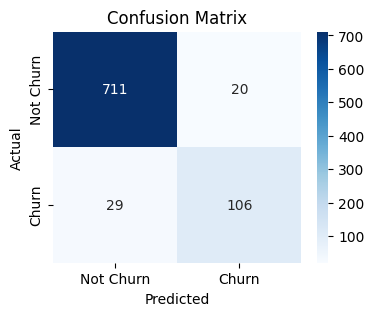

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (Opsional) Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

dari grafik diatas kita bisa simpulkan



*   0 : 0 = 711, ada sebanyak 711 yang aktualnya not churn prediksinya not churn
*   0 : 1 = 20, ada sebanyak 20 yang aktualnya not churn tapi prediksinya churn
*   1 : 0 = 29, ada sebanyak 29 pelanggan yang aktualnya churn tapi prediksinya not churn
*   1 : 1 = 106, ada sebanyak 106 pelanggan yang aktualnya churn prediksinya churn


kesimpulan akhir :
1. ada sebanyak 20 pelanggan yang dianggap not churn tapi churn dan ini bisa menyebabkan kerugian dikarenakan misal perusahaan ingin memberikan promosi terhadap pelanggan yang churn tapi malah salah promosi kepada pelanggan yang tidak churn
2. ada sebanyak 29 pelanggan yang sebenarnya churn tapi not churn, dan ini bisa menyebabkan kerugian terhadap pendapatan karena pelanggan yang berlanggan biasanya PO(preorder) nya cepat dibanding yang berlanggan



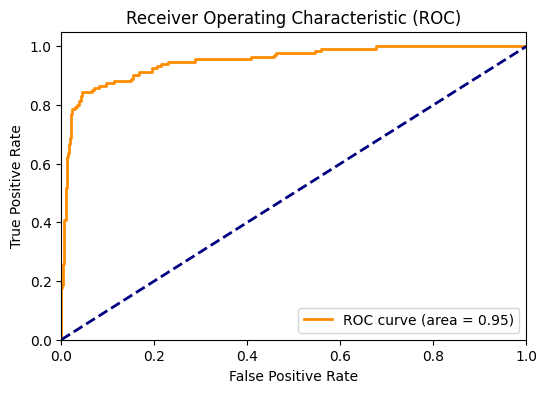

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

dari grafik diatas


*   saat hasil prediksi tru positif garis orange/roc curve nya pada TPR 0.8 hasil prediksinya mulai mengalami false positif yang artinya saat aktualnya 0 prediksinya malah 1
*   dan untuk roc curve area / AUC nya adalah 0.95 berarti model sudah baik dalam membedakan pelanggan yang churn dan not churn






| **Skor AUC** | **Kualitas Model**          | **Interpretasi**                          |
| ------------ | --------------------------- | ----------------------------------------- |
| 0.5          | **Random Guessing**         | Tidak lebih baik dari tebak-tebakan       |
| 0.6 – 0.7    | **Poor (Lemah)**            | Model kurang baik dalam klasifikasi       |
| 0.7 – 0.8    | **Fair (Cukup Baik)**       | Masih bisa diterima, tapi perlu perbaikan |
| 0.8 – 0.9    | **Good (Bagus)**            | Model cukup akurat dalam membedakan kelas |
| 0.9 – 1.0    | **Excellent (Sangat Baik)** | Model sangat akurat dan bisa diandalkan   |


## Feature importance

In [ ]:
import pandas as pd

feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Ambil importance dari model
importances = pipeline.named_steps['classifier'].feature_importances_


# Buat DataFrame importance
importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df['NormalizedImportance'] = importance_df['Importance'] / importance_df['Importance'].sum()
importance_df.drop(columns=['Importance'], inplace=True)

importance_df

,Fitur,NormalizedImportance
7,knn_imputer__CashbackAmount,0.179207
1,knn_imputer__WarehouseToHome,0.161149
15,rb_scaling__CashbackAmount,0.135157
0,knn_imputer__Tenure,0.108618
6,knn_imputer__DaySinceLastOrder,0.089398
4,knn_imputer__NumberOfAddress,0.080301
3,knn_imputer__SatisfactionScore,0.078317
2,knn_imputer__NumberOfDeviceRegistered,0.050958
5,knn_imputer__Complain,0.033311
14,onehot__MaritalStatus_Single,0.028523


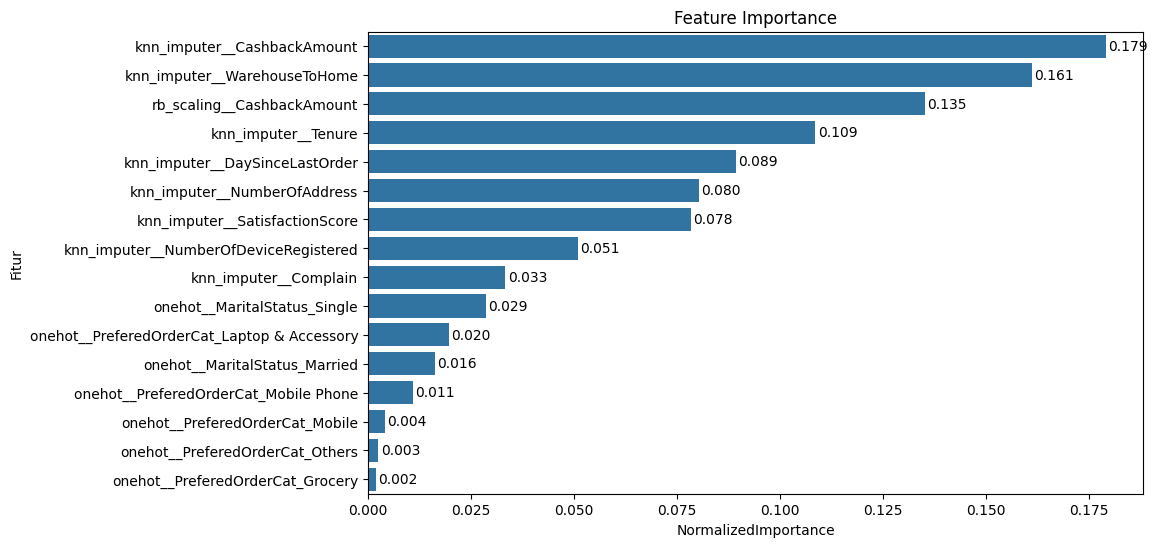

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='NormalizedImportance', y='Fitur', data=importance_df)

for p in ax.patches:
    x = p.get_width()  # Posisi X di akhir bar
    y = p.get_y() + p.get_height() / 2  # Posisi Y di tengah bar
    ax.text(x + 0.0102, y, f'{x:.3f}', va='center', fontsize=10, ha='right')

plt.title('Feature Importance')
plt.show()

## Evaluasi

### insight


1.   best model untuk data ini adalah LGBMClasifier
2.   dengan scaling score recall, precision, f1 score lebih baik
3.   melakukan penambahan data score recall, precision, f1 score meningkat




### kesimpulan

Semakin banyak data yang tersedia, maka:

- Model bisa memahami variasi pola dengan lebih baik.

- Kemampuan model untuk mendeteksi pelanggan churn (recall) meningkat.

- Model juga dapat mengurangi kesalahan prediksi (false positive dan false negative), sehingga precision dan F1-score juga membaik.

Catatan penting:
- Meskipun akurasi meningkat, tidak berarti model menjadi 100% akurat. Namun, peningkatan ini sudah cukup untuk:

- Meminimalkan potensi kerugian, seperti kehilangan pelanggan bernilai tinggi.

- Meningkatkan efisiensi pengambilan keputusan bisnis, karena model mampu menganalisis data dalam jumlah besar secara cepat, bahkan dalam hitungan menit

### Rekomendasi



1.   untuk beberapa bulan kedepan lakukan Campaign di berbagai kota besar supaya pelanggan baru semakin bertambah karena semakin banyak pelanggan bergabung walaupun pelanggan itu nanti churn atau not churn tapi dari sisi data kita bisa mempunyai data yang lebih banyak dan itu bisa menigkatkan keakuratan model yang sedang kita kembangkan
2.   untuk promosi promosi kepada pelanggan yang berlangganan/churn unntuk saat ini kita bisa mempromosikan tetapi kita bagi 3 step cth: step 1 model saat ini sudah bisa diimplementasikan tapi belum terlalau akurat maka kita bisa lakukan promosi tahap awal dan saat step 2 model menjadi lebih akurat dalam memprediksi kita bisa lakuaka promosi tahap 2 lalu step 3 juga sama misal model lebih akurat lagi dari pada step 2 kita bisa lakuakan promosi tahap 3, ini berguna untuk meminimalisir kerugian akibat salah promosi kepada pelanggan yang not churn tapi churn



manfaat stategi ini :
- Mengurangi kerugian akibat salah promosi.

- Memastikan promosi tepat sasaran seiring model makin akurat.

- Mendukung proses pengumpulan data berkualitas untuk pengembangan model selanjutnya.

# SAVE MODEL

In [ ]:
import joblib

# Simpan model
joblib.dump(pipeline, 'best_model_ecomerce_churn.pkl', compress=3) #compress digunakan pada model ukuran besar tapi ini saya pakai hanya opsional agar tahu kegunaannya

# Muat model
model_load = joblib.load('best_model_ecomerce_churn.pkl')

# model siap prediksi
model_load.predict(X)

array([0, 0, 0, ..., 0, 0, 1])

# DATA DASHBOARD

- load data

In [ ]:
import pandas as pd
data_ml = pd.read_csv('data_ml.csv')
data_ml

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3266,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3267,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3268,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


- cek missing value

In [ ]:
data_ml.isna().sum().sort_values(ascending=False)

,0
DaySinceLastOrder,181
Tenure,160
WarehouseToHome,135
NumberOfDeviceRegistered,0
PreferedOrderCat,0
MaritalStatus,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0
CashbackAmount,0


 - Imputasi dengan knn imputer

In [ ]:
from sklearn.impute import KNNImputer

data_num = data_ml.select_dtypes(include='number')

# Buat salinan data
data_knn_sub = data_num.copy()

# Inisialisasi dan fit-transform
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = knn_imputer.fit_transform(data_knn_sub)

# Masukkan kembali hasilnya ke DataFrame
data_knn_imputed = pd.DataFrame(data_imputed, columns=data_num.columns)

data_knn_imputed.isna().sum().sort_values(ascending=False)

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0
Churn,0


In [ ]:
data_knn_imputed

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,20.0,25.0,4.0,3.0,7.0,0.0,6.0,230.27,0.0
4,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5.0,4.0,7.0,0.0,8.0,249.90,0.0
3266,26.0,7.0,4.0,1.0,4.0,0.0,9.0,295.99,0.0
3267,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3268,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0


- menggabungkan data

In [ ]:
data1 = pd.concat([data_knn_imputed, data_ml[['MaritalStatus','PreferedOrderCat']]], axis=1)
data1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,MaritalStatus,PreferedOrderCat
0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0,Single,Laptop & Accessory
1,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0,Married,Mobile
2,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0,Married,Laptop & Accessory
3,20.0,25.0,4.0,3.0,7.0,0.0,6.0,230.27,0.0,Divorced,Fashion
4,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0,Single,Others
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5.0,4.0,7.0,0.0,8.0,249.90,0.0,Married,Fashion
3266,26.0,7.0,4.0,1.0,4.0,0.0,9.0,295.99,0.0,Married,Grocery
3267,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0,Married,Fashion
3268,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0,Single,Mobile Phone


- cel missing value lagi

In [ ]:
data1.isna().sum()

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0
Churn,0
MaritalStatus,0


- Ubah value di data churn dan complain 0:tidak 1:iya

In [ ]:
data1[['Churn','Complain']] = data1[['Churn','Complain']].replace({0: 'tidak', 1: 'iya'})
data1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,MaritalStatus,PreferedOrderCat
0,15.0,29.0,4.0,3.0,2.0,tidak,7.0,143.32,tidak,Single,Laptop & Accessory
1,7.0,25.0,4.0,1.0,2.0,tidak,7.0,129.29,tidak,Married,Mobile
2,27.0,13.0,3.0,1.0,5.0,tidak,7.0,168.54,tidak,Married,Laptop & Accessory
3,20.0,25.0,4.0,3.0,7.0,tidak,6.0,230.27,tidak,Divorced,Fashion
4,30.0,15.0,4.0,4.0,8.0,tidak,8.0,322.17,tidak,Single,Others
...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5.0,4.0,7.0,tidak,8.0,249.90,tidak,Married,Fashion
3266,26.0,7.0,4.0,1.0,4.0,tidak,9.0,295.99,tidak,Married,Grocery
3267,28.0,9.0,5.0,3.0,8.0,tidak,1.0,231.86,tidak,Married,Fashion
3268,8.0,7.0,2.0,2.0,4.0,tidak,4.0,157.80,tidak,Single,Mobile Phone


In [ ]:
data1.to_csv('data_ecomerce_churn.csv', index=False)